# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [2]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
print yelp.head(1)
print yelp.shape

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
(10000, 10)


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [3]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

In [4]:
# show the first review


In [5]:
# convert the list of dictionaries to a DataFrame


In [6]:
# add DataFrame columns for cool, useful, and funny


In [7]:
# drop the votes column and then display the head


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [8]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
#yelp.sort_values(by='stars', inplace = True)
#yelp.describe()
#%matplotlib inline
#yelp.plot(kind='scatter', x='funny', y='stars', alpha=0.2)
yelp.groupby('stars').mean()

,cool,useful,funny
stars,,,
1,0.576769,1.604806,1.056075
2,0.719525,1.563107,0.875944
3,0.788501,1.306639,0.694730
4,0.954623,1.395916,0.670448
5,0.944261,1.381780,0.608631


           stars      cool    useful     funny
stars   1.000000  0.052555 -0.023479 -0.061306
cool    0.052555  1.000000  0.887102  0.764342
useful -0.023479  0.887102  1.000000  0.723406
funny  -0.061306  0.764342  0.723406  1.000000


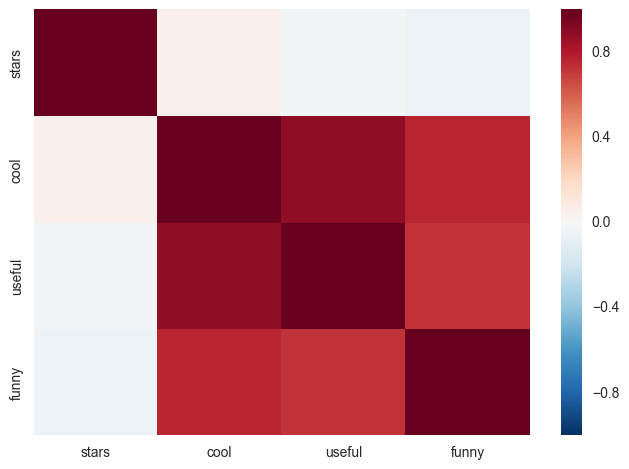

In [9]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
print yelp.corr()
sns.heatmap(yelp.corr())

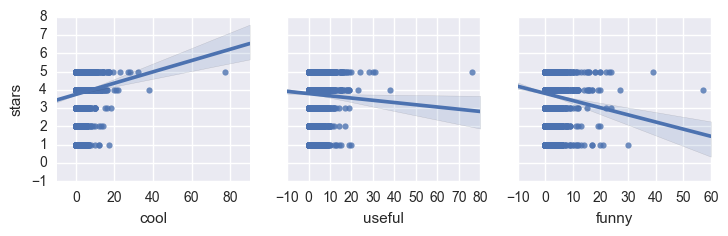

In [10]:
# display multiple scatter plots (cool, useful, funny) with linear regression line

# Define features
feature_cols = ['cool', 'useful', 'funny']

# multiple scatter plots in Seaborn
sns.pairplot(yelp, x_vars=feature_cols, y_vars='stars', kind='reg')

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

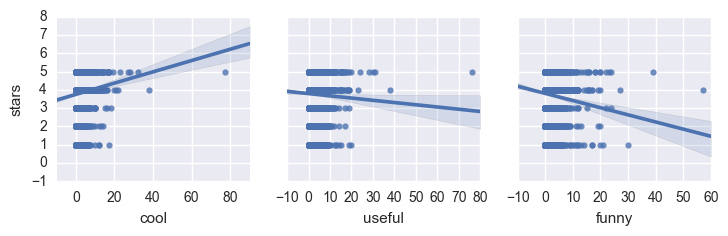

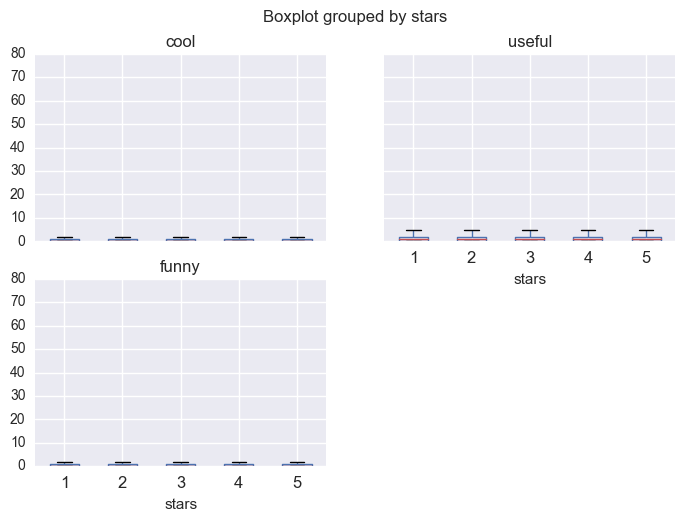

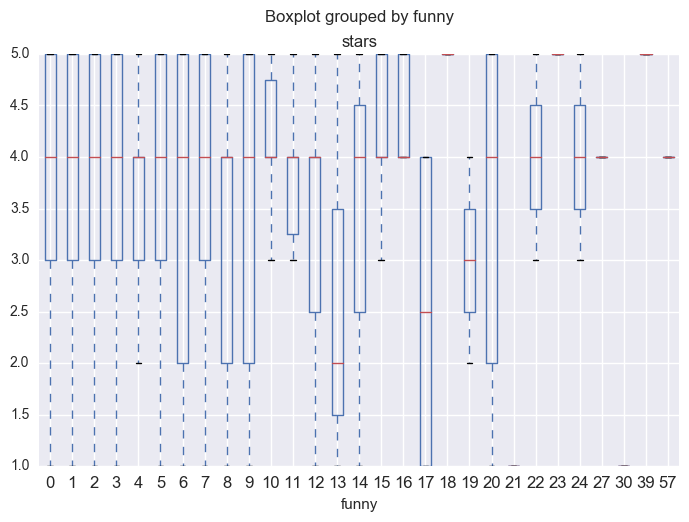

In [11]:
# Same as code above...
# display multiple scatter plots (cool, useful, funny) with linear regression line

# Define features
feature_cols = ['cool', 'useful', 'funny']

# multiple scatter plots in Seaborn
sns.pairplot(yelp, x_vars=feature_cols, y_vars='stars', kind='reg')

# The scale is off on this first set of box plots, and also there are no values >5, which is wrong. Why?
yelp.boxplot(column=feature_cols,by='stars')
yelp.boxplot(column='stars', by='funny')

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [12]:
from sklearn.linear_model import LinearRegression
X = yelp[feature_cols]
y = yelp.stars
print X.shape
print y.shape

linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients, ie y = mX + b
print linreg.intercept_ # b
print linreg.coef_ # m
# The coefficients make sense - as the higher cool ratings are correlated with higher star ratings.
# Additionally, higher useful and funny ratings are negatively correlated with star ratings.
# I would have expected the funny coefficient to be more negative as the scatterplot has a more negative
# best fit line (although the spread of point)

(10000, 3)
(10000L,)
3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [14]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [15]:
# calculate RMSE with all three features
print train_test_rmse(['cool', 'useful', 'funny'])


1.17336862742


## Task 6

Try removing some of the features and see if the RMSE improves.

In [16]:
# calculate RMSE with only some of the three features
print train_test_rmse(['cool'])
print train_test_rmse(['useful'])
print train_test_rmse(['funny'])
print train_test_rmse(['cool', 'useful'])
print train_test_rmse(['cool', 'funny'])
print train_test_rmse(['useful', 'funny'])

1.20049049928
1.20143488625
1.20043591364
1.18537944234
1.1851949299
1.20070113589


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [17]:
# new feature: 

In [18]:
# new features: 


In [19]:
# add new features to the model and calculate RMSE


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [25]:
# X and y were defined in Task 4
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)
print y_null.shape

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

(2500L,)


array([ 3.7808,  3.7808,  3.7808, ...,  3.7808,  3.7808,  3.7808])

In [24]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.2019861563262699

In [26]:
# The best RMSE was 1.17336862742 from using all three features, and the null RMSE was 1.2019781029619465
# This result is not too surprising - none of these features had a strong correlation with the response
# so the model using all features is only slightley better than the null RMSE